In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm
from glob import glob
import os
from qwind import constants
from pyagn import sed
from scipy.optimize import curve_fit
import importlib
import plotting
importlib.reload(plotting)

<module 'plotting' from '/cosma7/data/dp004/dc-quer1/qwind/Notebooks/plotting.py'>

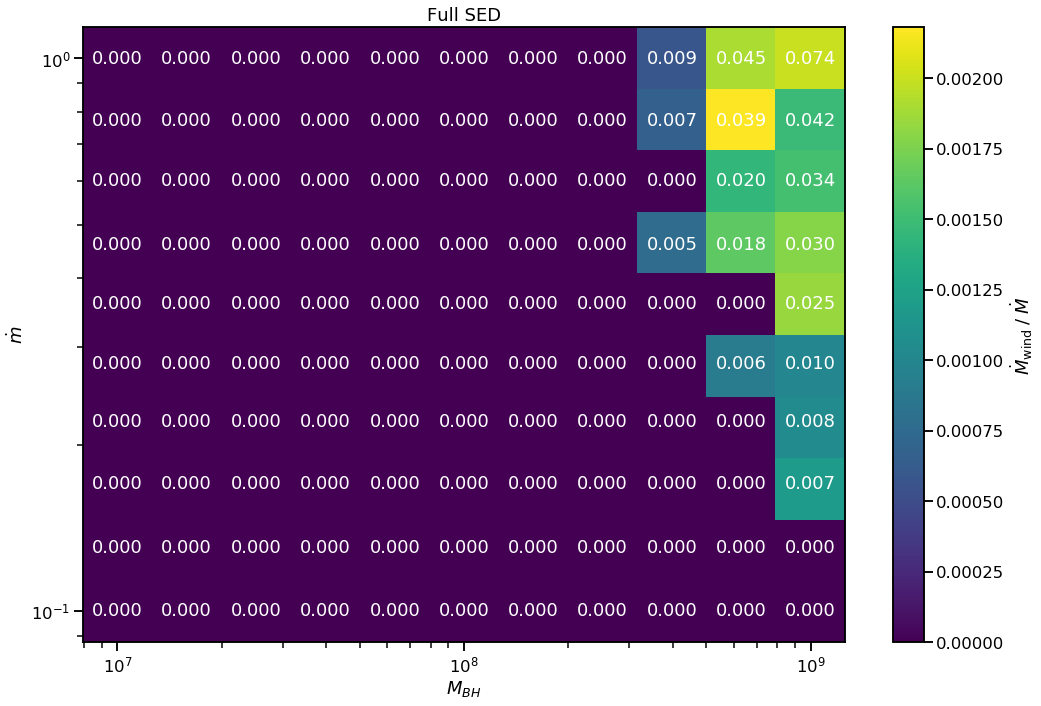

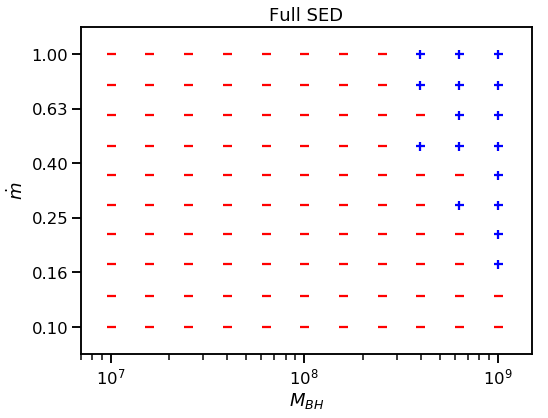

In [16]:
GRID_FOLDER = "../qsosed/rho_1e08/"
fig, ax = plotting.plot_mloss_grid(GRID_FOLDER, title = "Full SED")
#fig.savefig("full_sed.png", dpi = 200, bbox_to_inches = "tight")
fig, ax = plotting.plot_cross_grid(GRID_FOLDER, title = "Full SED")
#fig.savefig("full_sed_grid.png", dpi = 200, bbox_to_inches = "tight")

../qsosed/rho_1e07/M_1.00e+07_mdot_0.10


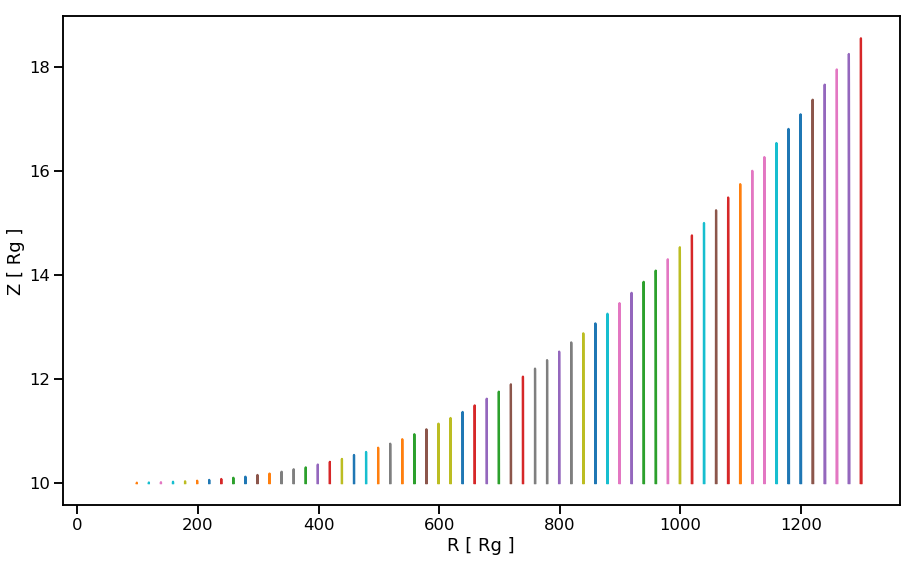

../qsosed/rho_1e07/M_1.00e+07_mdot_0.13


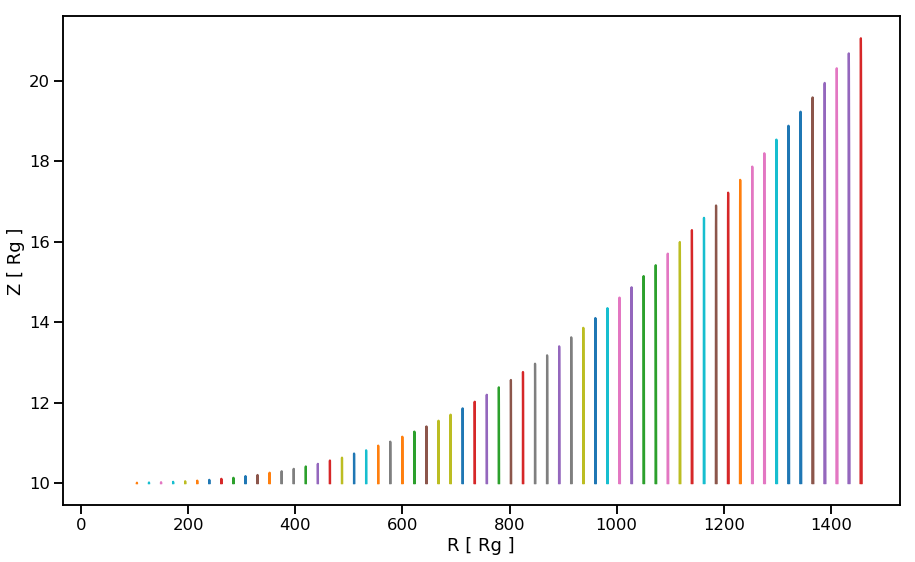

../qsosed/rho_1e07/M_1.00e+07_mdot_0.17


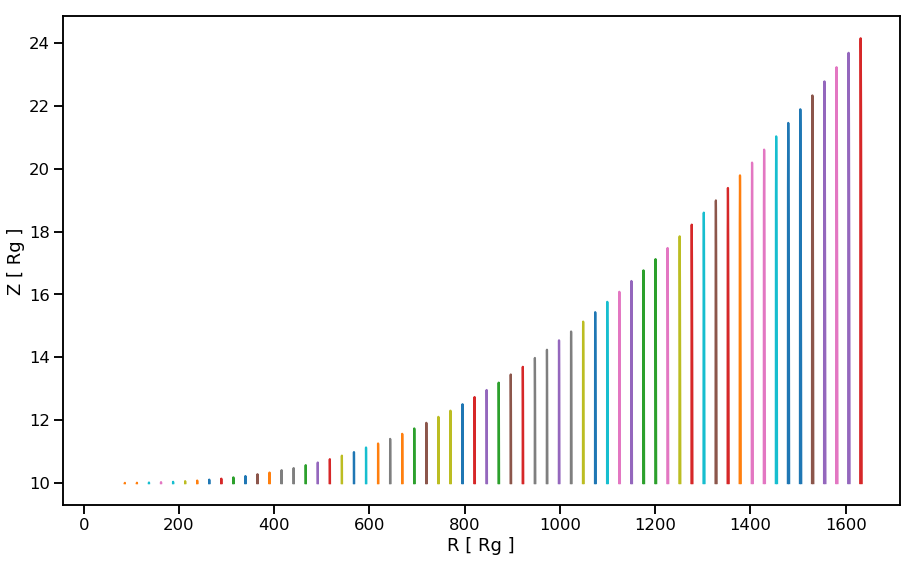

../qsosed/rho_1e07/M_1.00e+07_mdot_0.22


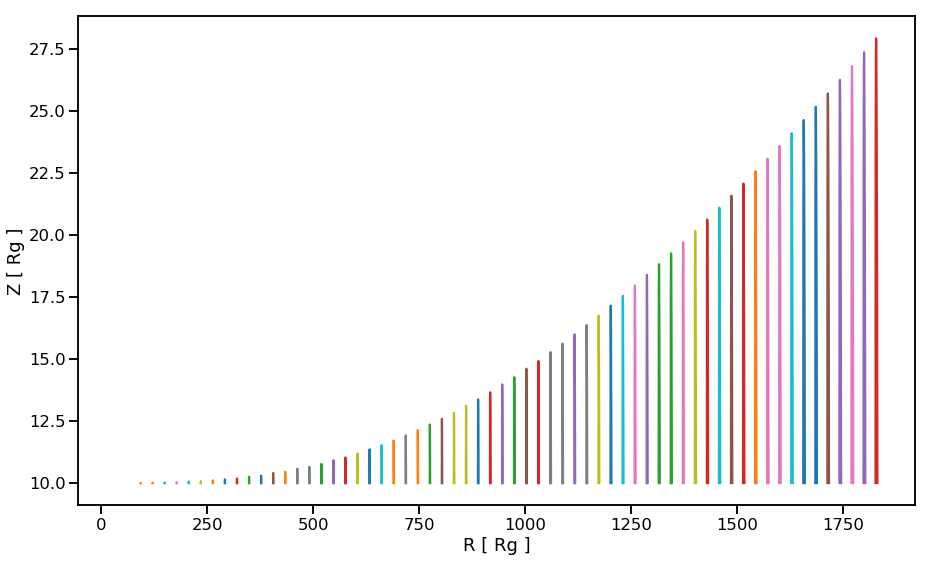

../qsosed/rho_1e07/M_1.00e+07_mdot_0.28


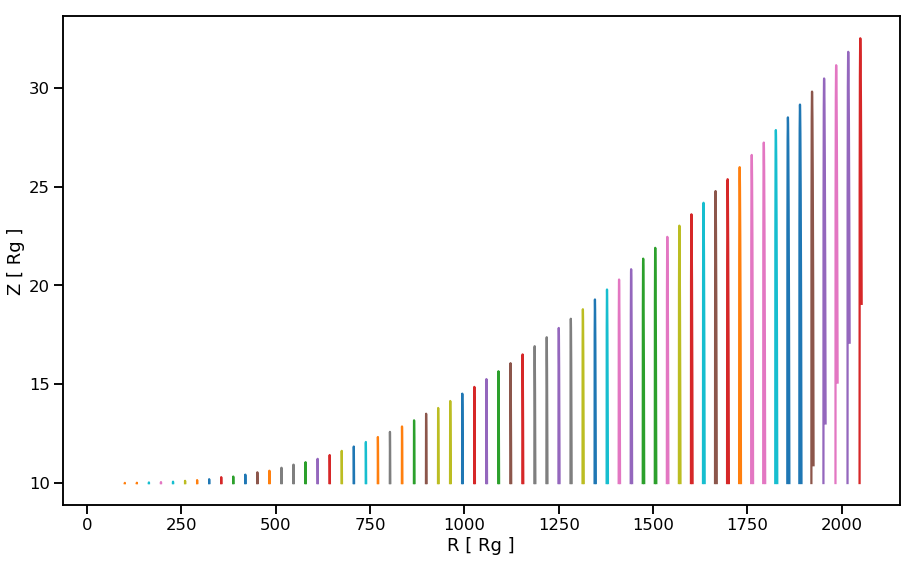

../qsosed/rho_1e07/M_1.00e+07_mdot_0.46


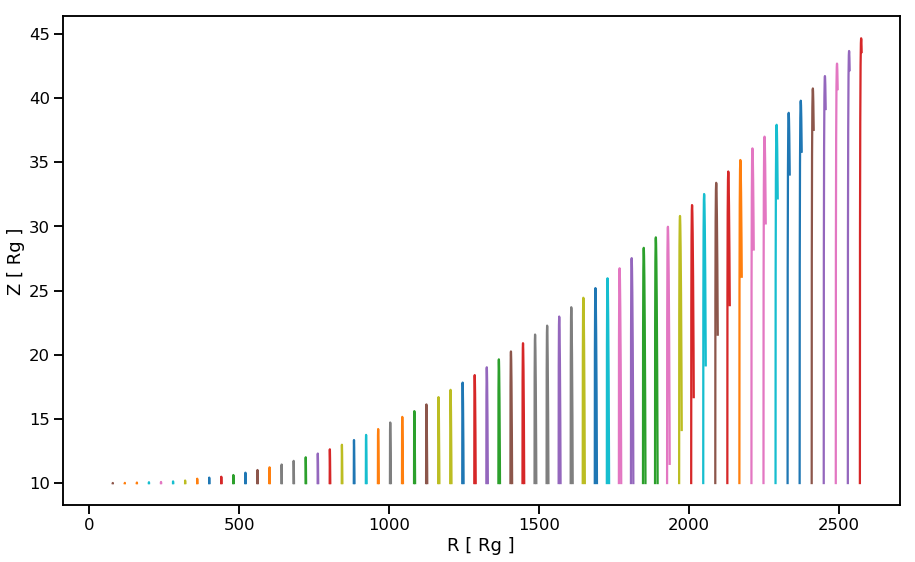

../qsosed/rho_1e07/M_1.00e+07_mdot_0.77


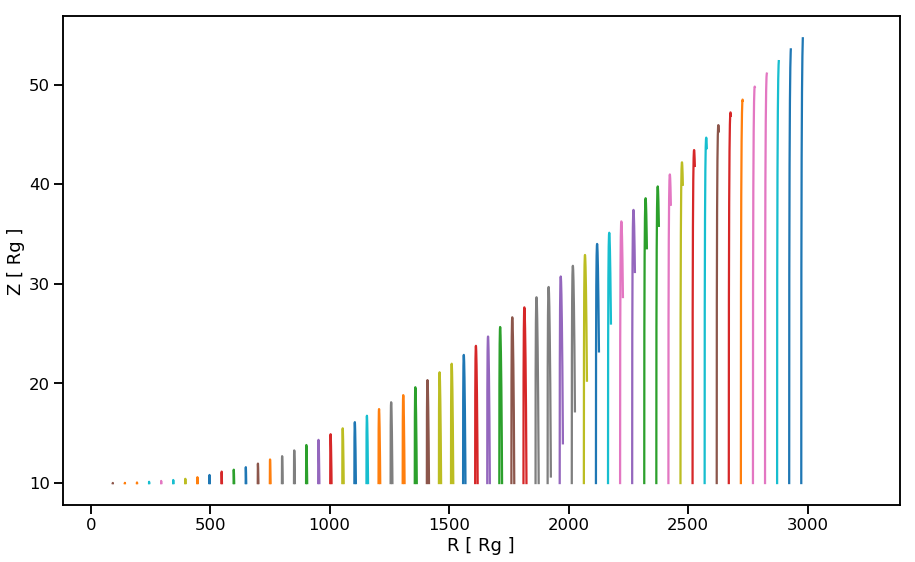

../qsosed/rho_1e07/M_1.00e+08_mdot_0.10


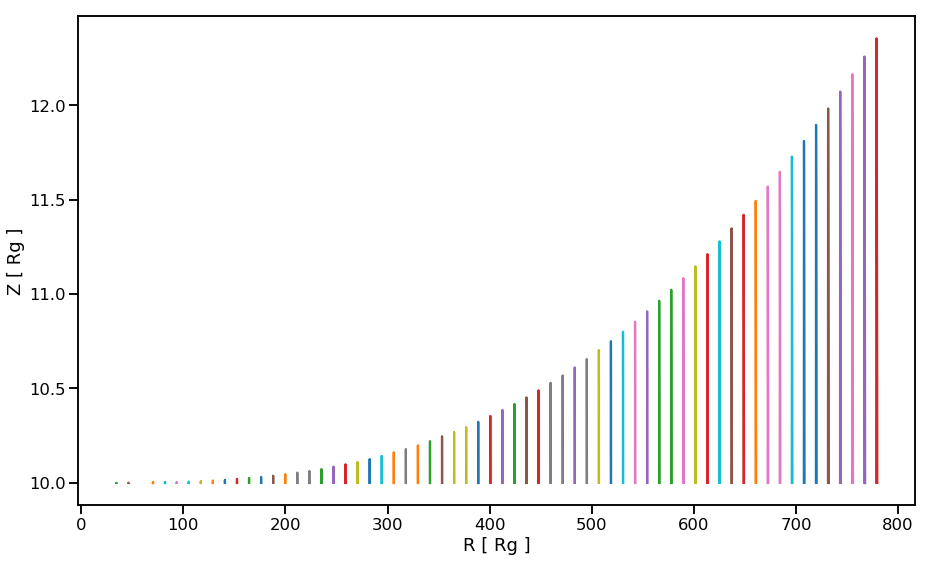

../qsosed/rho_1e07/M_1.00e+08_mdot_0.13


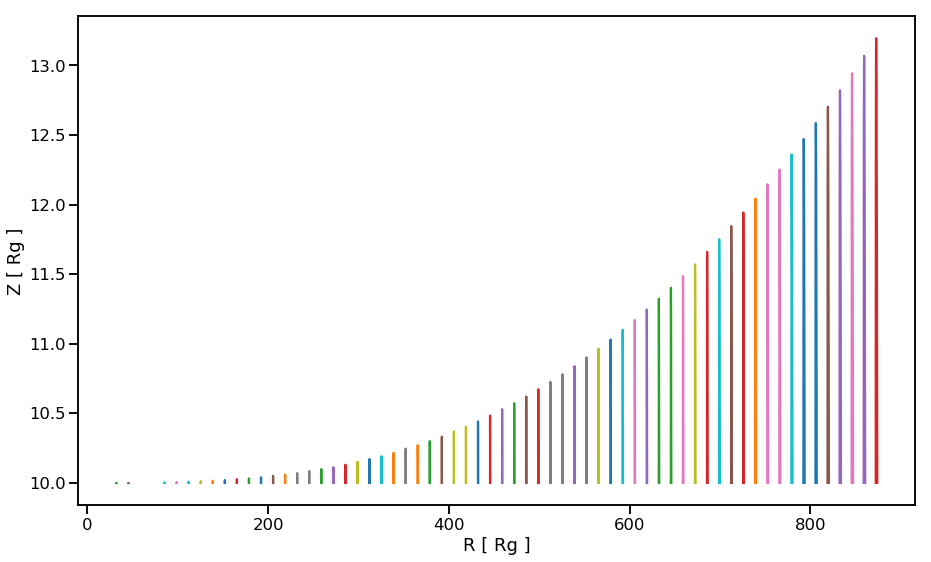

../qsosed/rho_1e07/M_1.00e+08_mdot_0.17


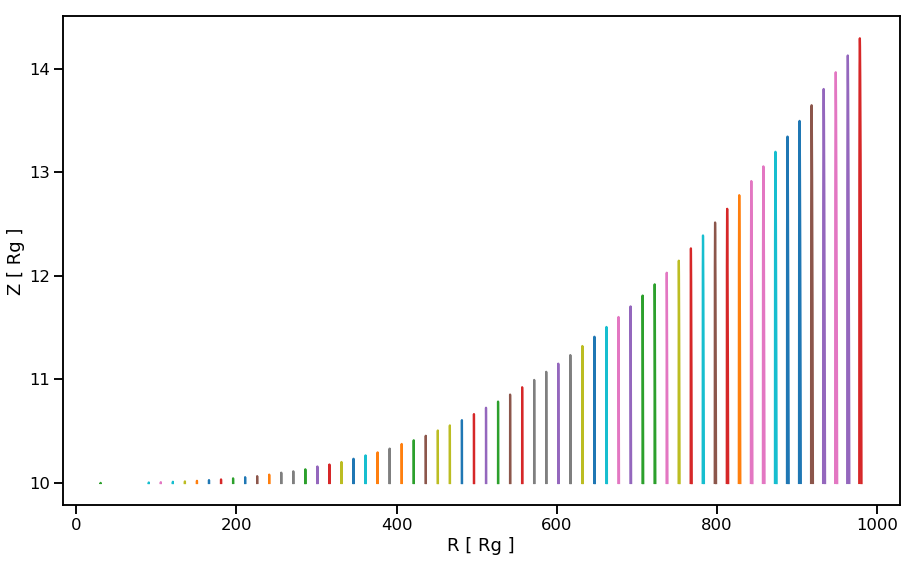

../qsosed/rho_1e07/M_1.58e+07_mdot_0.10


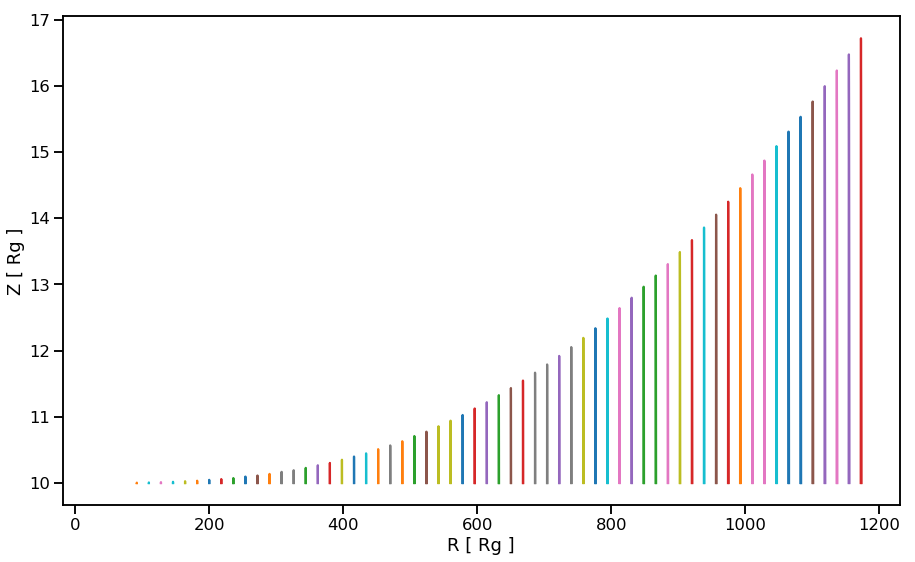

../qsosed/rho_1e07/M_1.58e+07_mdot_0.13


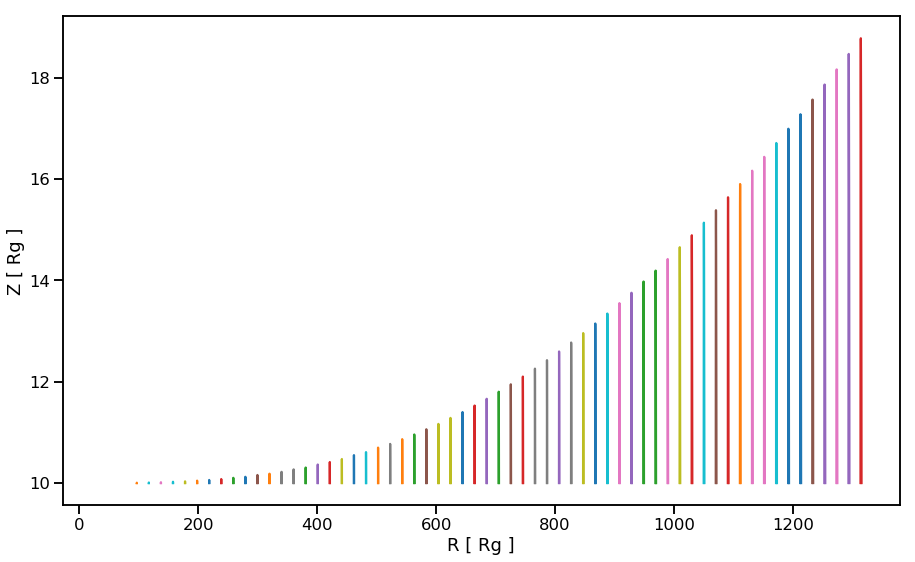

../qsosed/rho_1e07/M_1.58e+07_mdot_0.17


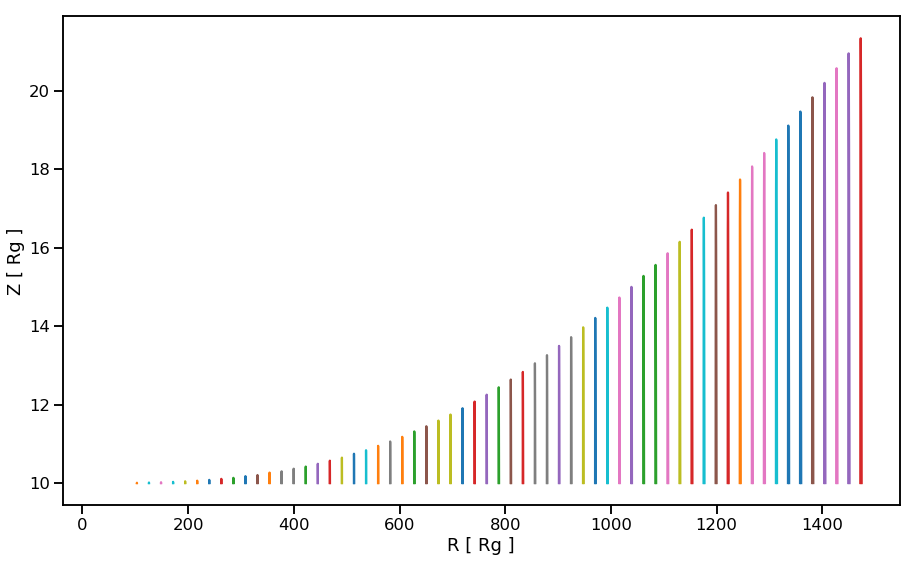

../qsosed/rho_1e07/M_1.58e+07_mdot_0.22


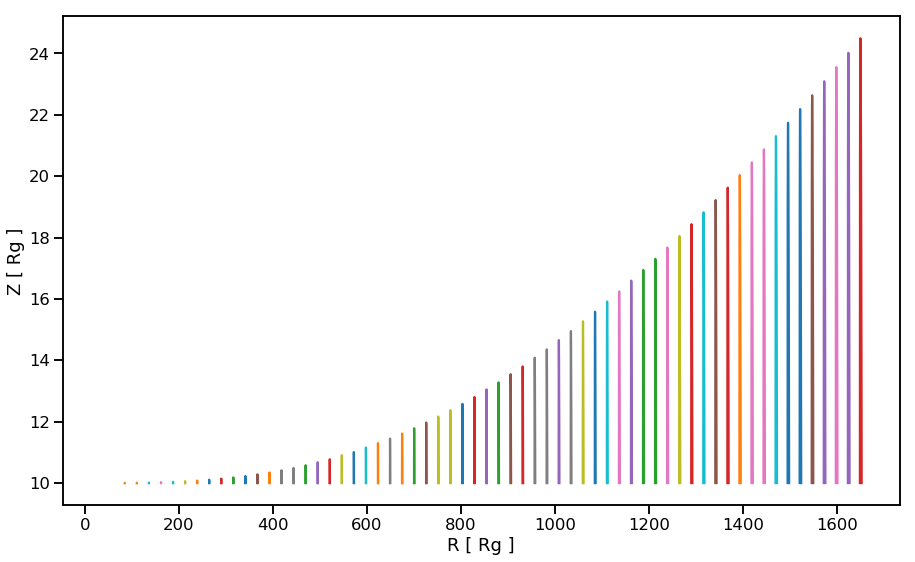

../qsosed/rho_1e07/M_1.58e+07_mdot_0.28


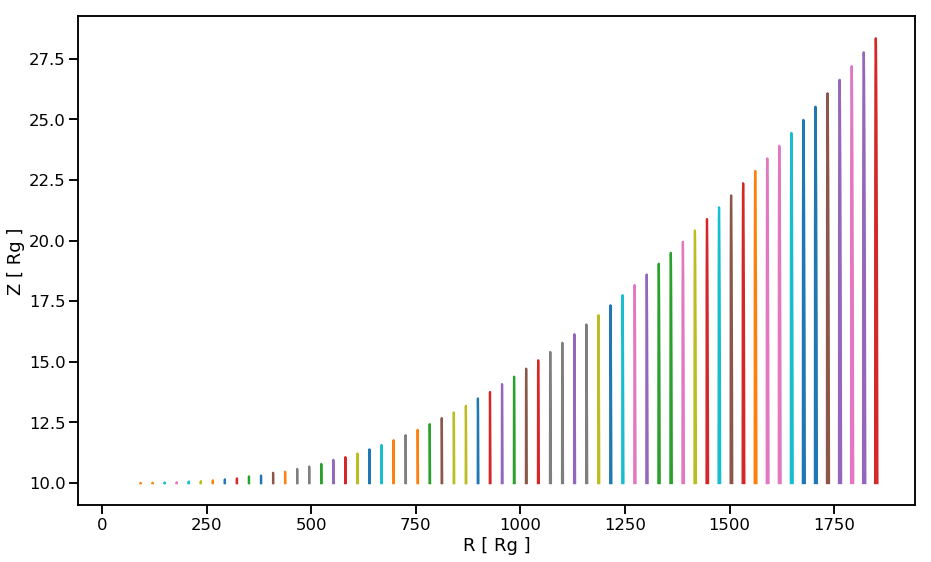

../qsosed/rho_1e07/M_1.58e+07_mdot_0.46


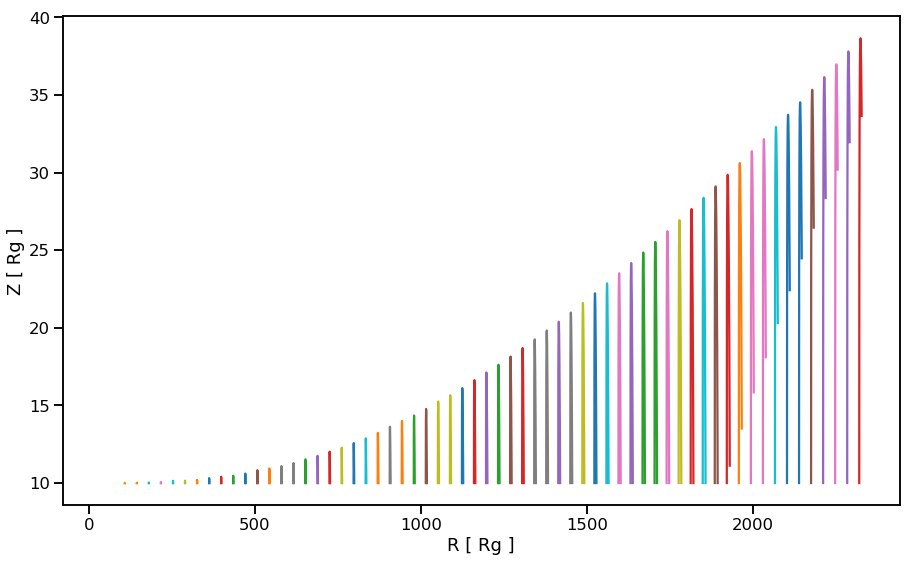

../qsosed/rho_1e07/M_1.58e+07_mdot_0.77


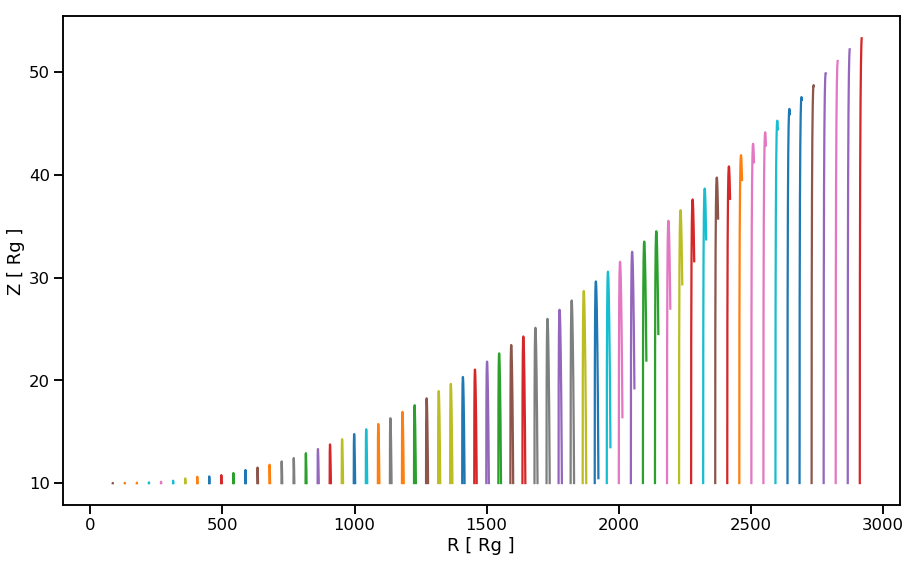

../qsosed/rho_1e07/M_2.51e+07_mdot_0.10


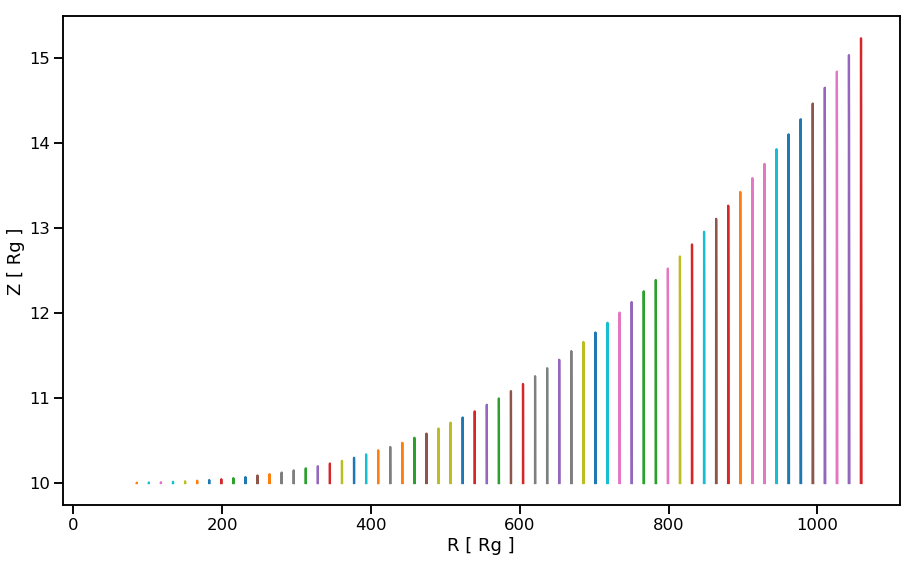

../qsosed/rho_1e07/M_2.51e+07_mdot_0.13


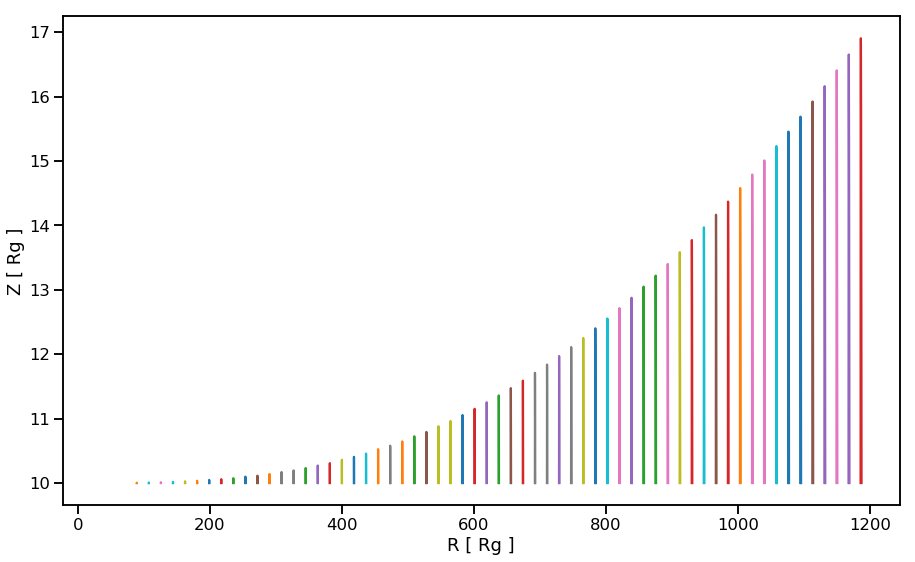

../qsosed/rho_1e07/M_2.51e+07_mdot_0.17


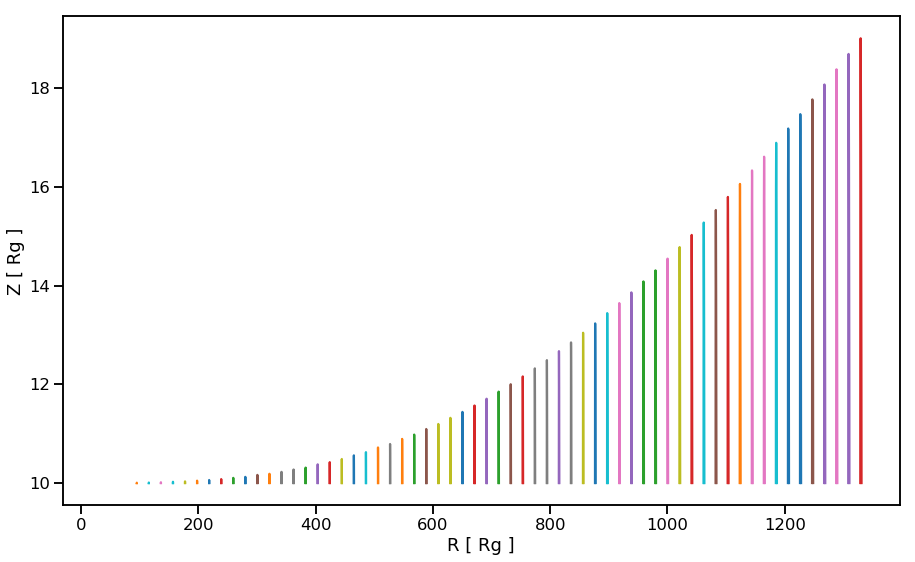

../qsosed/rho_1e07/M_2.51e+07_mdot_0.22


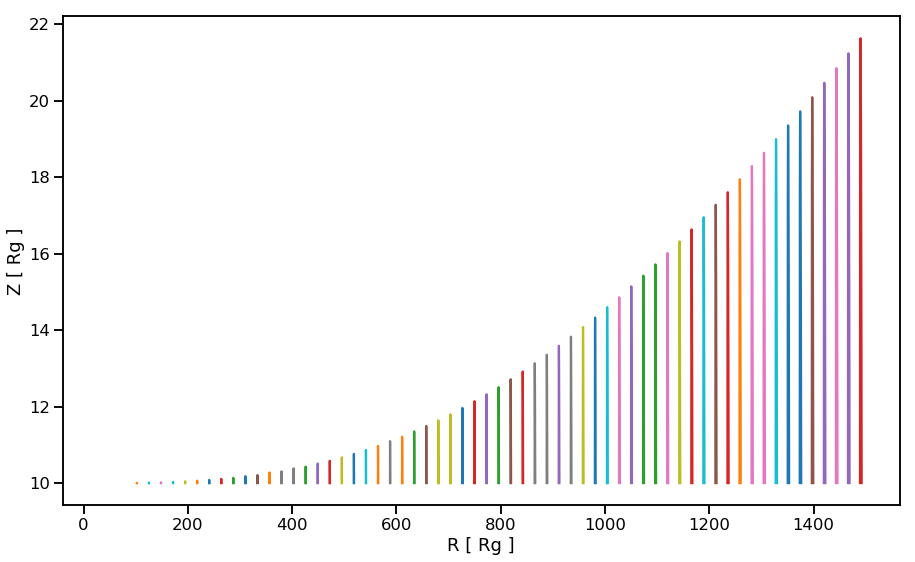

../qsosed/rho_1e07/M_2.51e+07_mdot_0.28


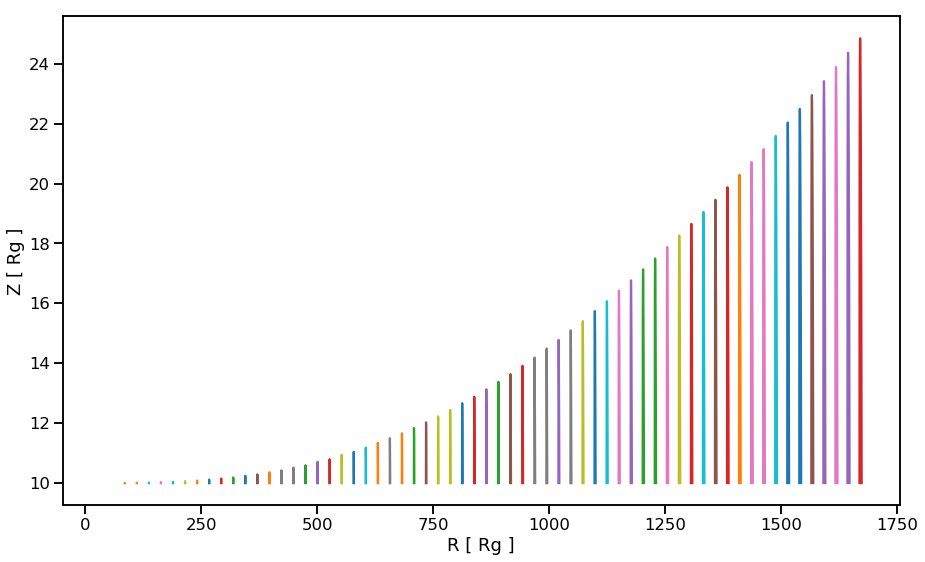

../qsosed/rho_1e07/M_2.51e+07_mdot_0.36


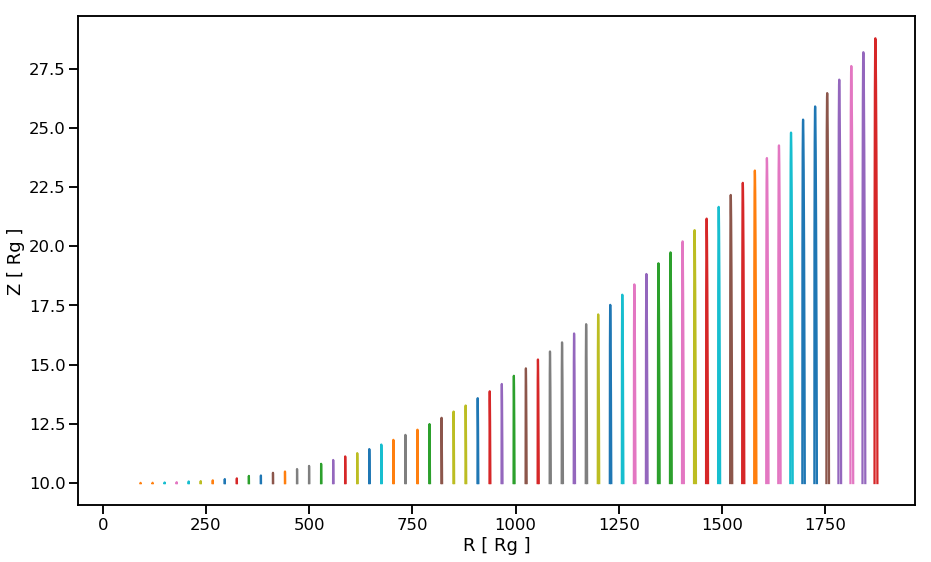

../qsosed/rho_1e07/M_2.51e+07_mdot_0.46


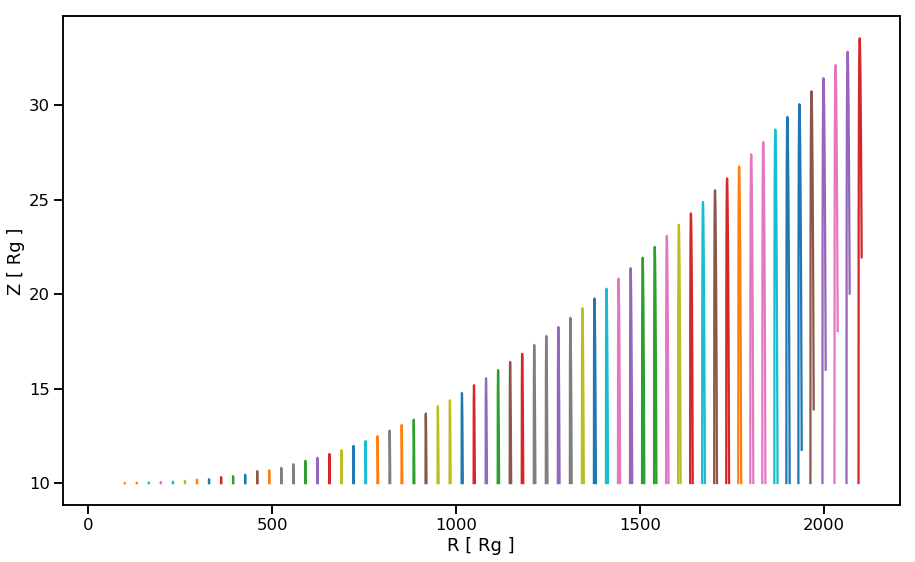

../qsosed/rho_1e07/M_2.51e+07_mdot_0.77


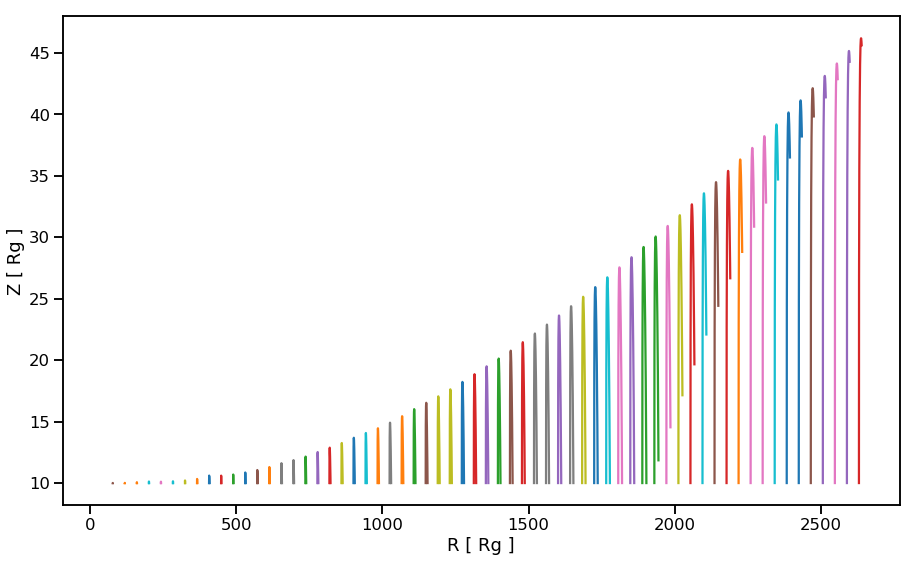

../qsosed/rho_1e07/M_3.98e+07_mdot_0.10


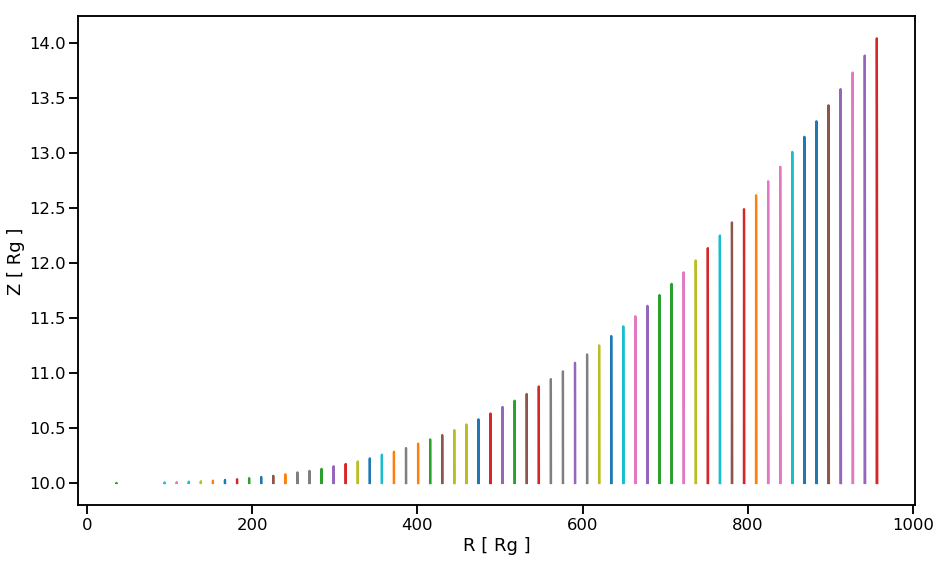

../qsosed/rho_1e07/M_3.98e+07_mdot_0.13


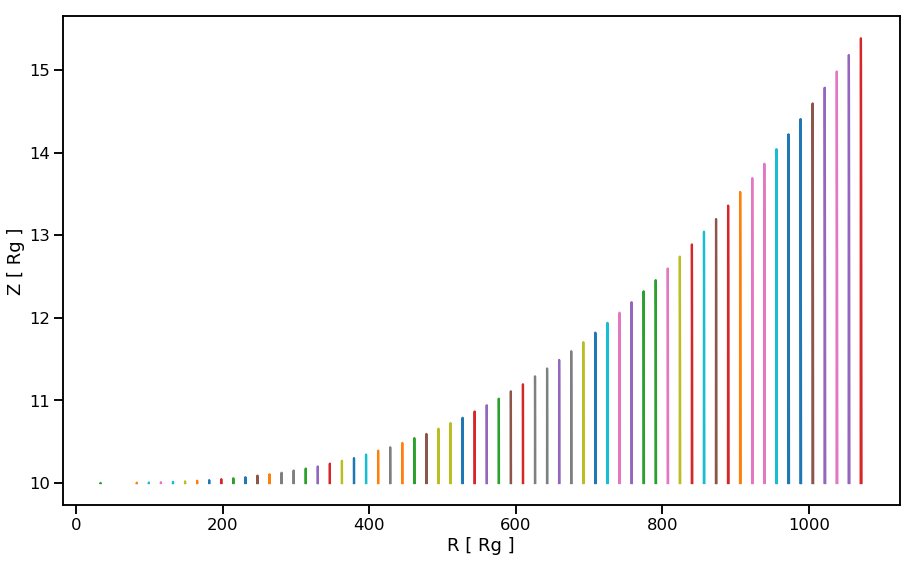

../qsosed/rho_1e07/M_3.98e+07_mdot_0.17


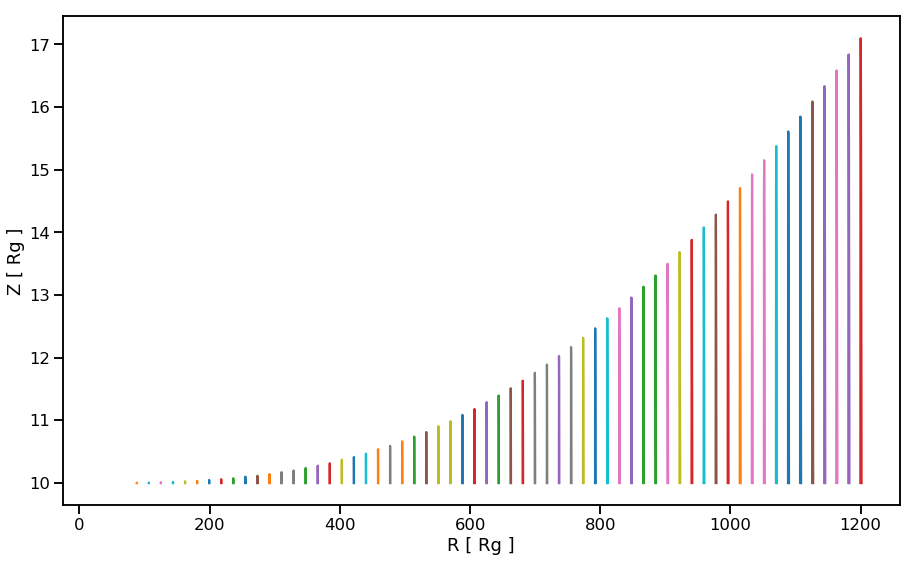

../qsosed/rho_1e07/M_3.98e+07_mdot_0.22


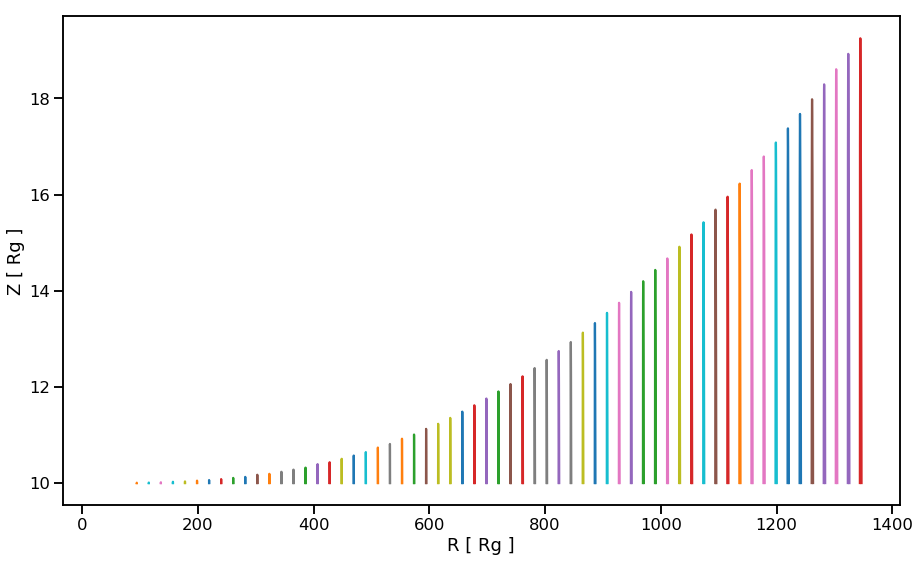

../qsosed/rho_1e07/M_3.98e+07_mdot_0.28


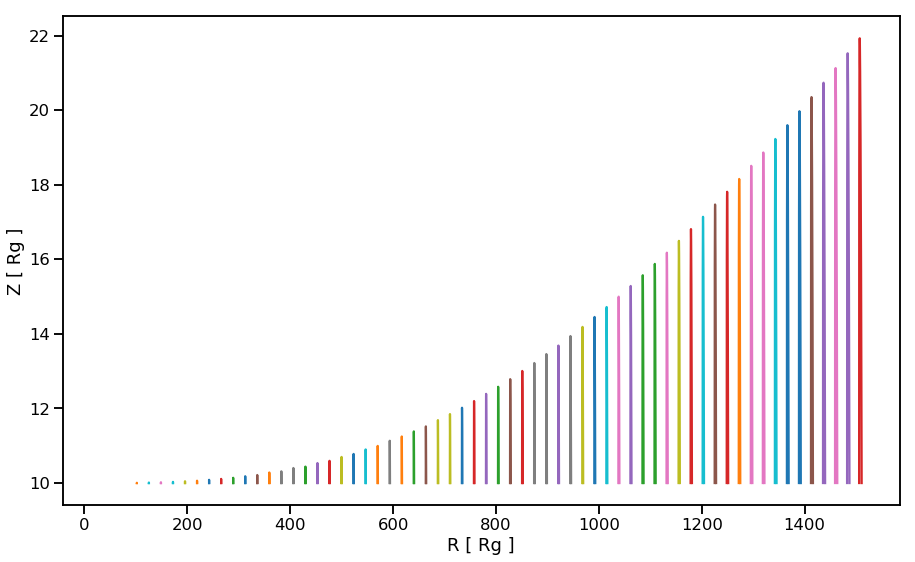

../qsosed/rho_1e07/M_3.98e+07_mdot_0.36


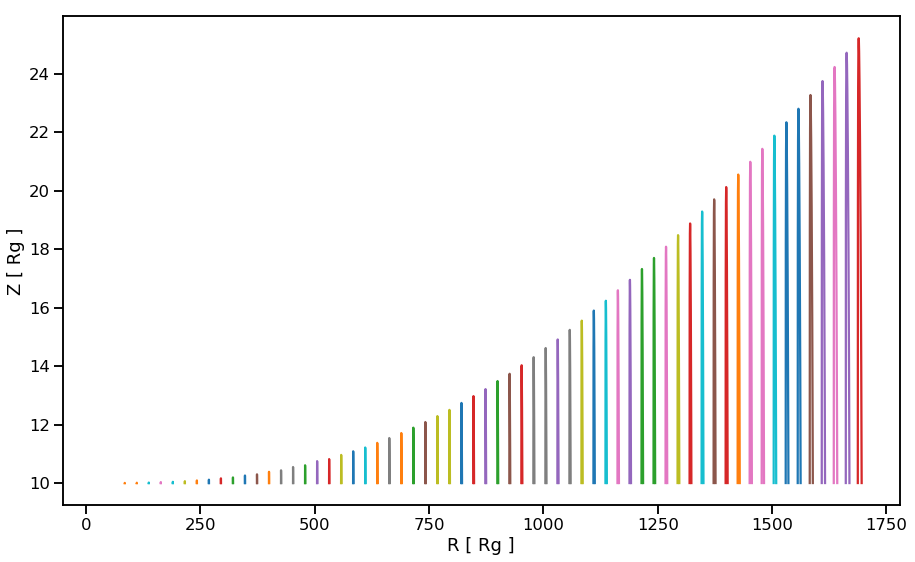

../qsosed/rho_1e07/M_3.98e+07_mdot_0.46


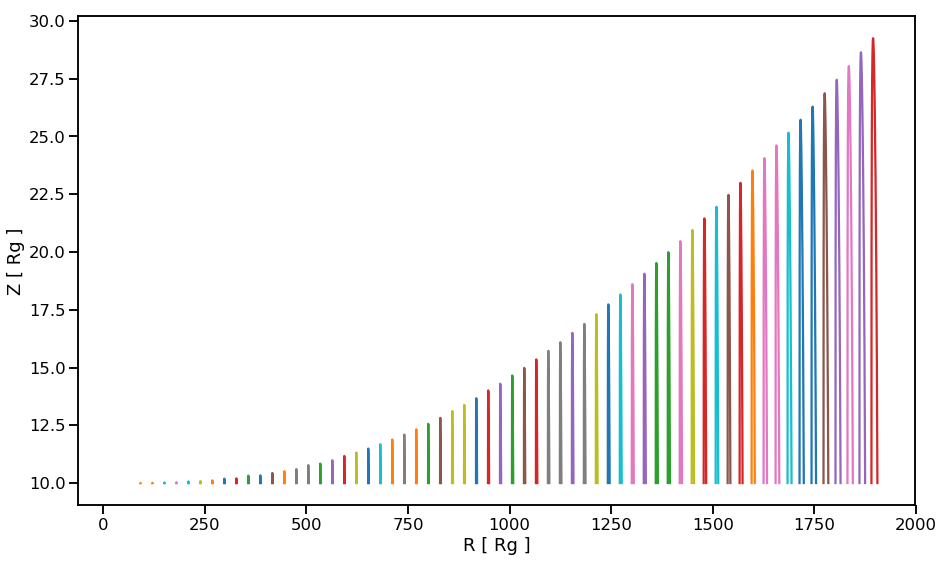

../qsosed/rho_1e07/M_6.31e+07_mdot_0.10


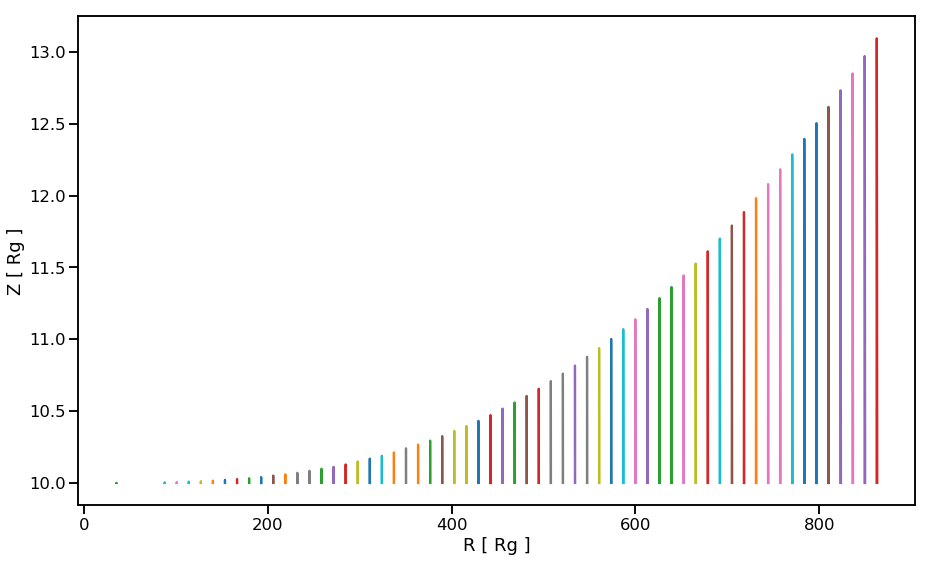

../qsosed/rho_1e07/M_6.31e+07_mdot_0.13


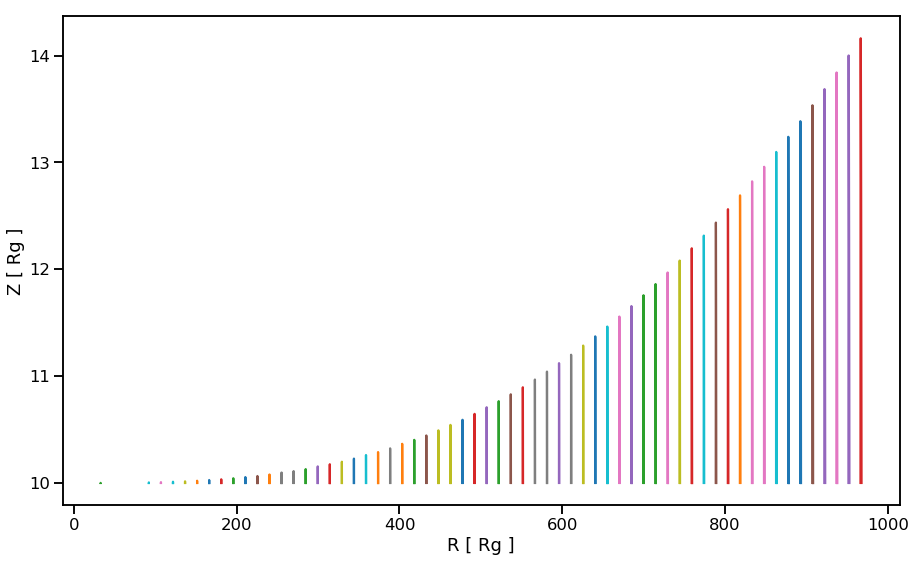

../qsosed/rho_1e07/M_6.31e+07_mdot_0.17


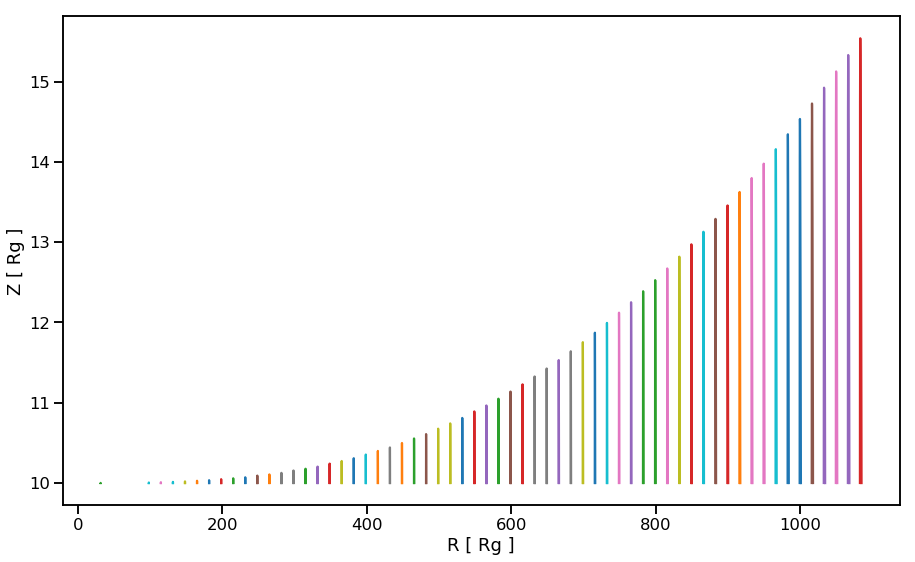

../qsosed/rho_1e07/M_6.31e+07_mdot_0.22


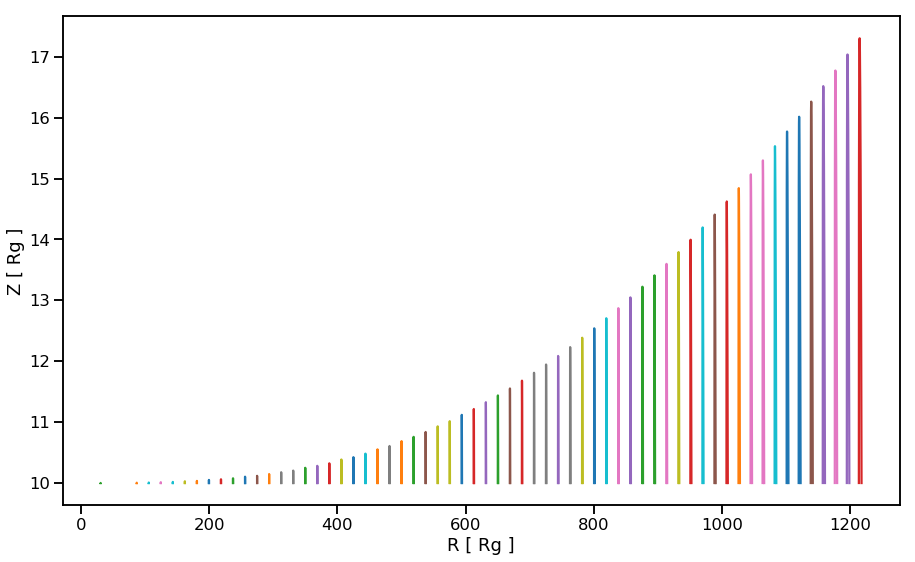

../qsosed/rho_1e07/M_6.31e+07_mdot_0.28


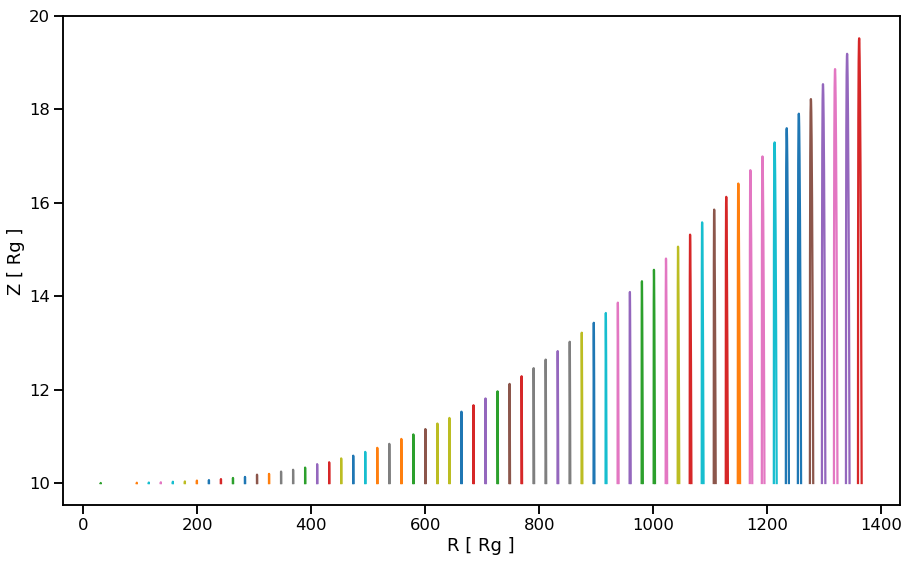

In [11]:
bhs = np.sort(glob("../qsosed/rho_1e07/*"))
for bh in bhs:
    print(bh)
    lines = glob(os.path.join(bh,"line*"))
    plt.figure(figsize=(15,9))
    plt.xlabel("R [ Rg ]")
    plt.ylabel("Z [ Rg ]")
    for line in lines:
        lin = pd.read_csv(line)
       # print(lin)
        plt.plot(lin.R, lin.Z)
    #plt.ylim(7,20)
    #plt.xlim(0,1000)
    plt.show()
    
#plt.savefig("M1e9_lines.png", dpi = 300, bbox_to_inches = "tight")

In [66]:
asd = pd.read_csv(lines[3])
asd.head()

,R,P,Z,X,V_R,V_PHI,V_Z,V_T,a,rho,xi,fm,tau_dr,tau_uv,tau_x,dv_dr,dr_e,escaped,V_esc
0,704.240284,0.000000,10.000000,"[704.2402837666616, 0, 10.0]",0.000000e+00,0.037682,0.000334,0.000334,[0 0 0],1.356016e+13,7.328757e-46,1.000000,33.459322,50,100,0.000000,0.000000,0.0,0.053288
1,704.240284,0.000022,10.000137,"[704.2402837667128, 2.1916876085327095e-05, 10...",2.497229e-10,0.037682,0.000334,0.000334,[ 6.09674957e-10 0.00000000e+00 -2.86224016e-08],1.356063e+13,3.698513e-44,0.019236,33.460498,50,100,0.000086,4.994797,0.0,0.053288
2,704.240284,0.000044,10.000273,"[704.2402837668662, 4.383375217065101e-05, 10....",4.994525e-10,0.037682,0.000334,0.000334,[ 6.09691612e-10 0.00000000e+00 -2.86227924e-08],1.356111e+13,3.698383e-44,0.019236,33.461674,50,100,0.000086,4.994553,0.0,0.053288
3,704.240284,0.000066,10.000410,"[704.2402837671219, 6.575062825596537e-05, 10....",7.491891e-10,0.037682,0.000334,0.000334,[ 6.09708267e-10 0.00000000e+00 -2.86231832e-08],1.356159e+13,3.698253e-44,0.019237,33.462850,50,100,0.000086,4.994310,0.0,0.053288
4,704.240284,0.000088,10.000546,"[704.2402837674799, 8.766750434126382e-05, 10....",9.989324e-10,0.037682,0.000334,0.000334,[ 6.09724921e-10 0.00000000e+00 -2.86235740e-08],1.356206e+13,3.698123e-44,0.019237,33.464027,50,100,0.000086,4.994066,0.0,0.053288


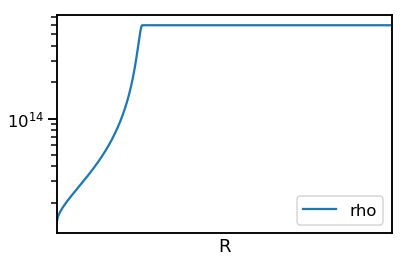

In [68]:
asd.plot(x = 'R', y='rho', loglog=True)

In [2]:
FOLDER = "../qsosed/qsosed_2e8/M_1.00e+09_mdot_0.28/"
lines = []
for file in np.sort(glob(FOLDER + "lin*.csv")):
    lines.append(pd.read_csv(file))


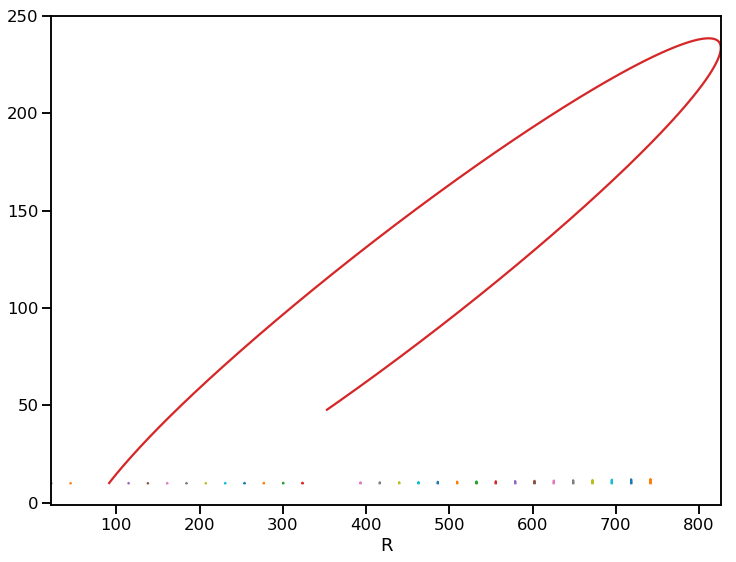

In [3]:
fig, ax = plt.subplots(figsize=(12,9))
for line in lines:
    line.plot(x='R', y='Z', ax=ax, legend=False)

In [4]:
debug = lines[3]

In [5]:
debug.head()

,R,P,Z,X,V_R,V_PHI,V_Z,V_T,a,rho,xi,fm,tau_dr,tau_uv,tau_x,dv_dr,dr_e,escaped,V_esc
0,91.311778,0.000000,10.000000,"[91.31177807771952, 0, 10.0]",0.000000,0.104649,0.000334,0.000334,[0 0 0],2.000000e+08,6.829228e-09,1.000000,0.019646,1.376974,30.565744,0.000000,0.000000,0.0,0.147556
1,91.311778,0.000469,10.000136,"[91.31177829241769, 0.0004694288193052022, 10....",0.000001,0.104649,0.000328,0.000328,[ 2.55940153e-06 0.00000000e+00 -1.25957009e-05],2.031409e+08,6.723597e-09,60.922151,0.019955,1.376974,30.565750,-0.038043,0.011266,0.0,0.147556
2,91.311781,0.000939,10.000271,"[91.31178115265169, 0.0009388576364029017, 10....",0.000013,0.104649,0.000331,0.000331,[2.89778434e-05 0.00000000e+00 6.05729777e-06],2.014653e+08,6.779445e-09,44.484693,0.019790,1.376974,30.565760,-0.021967,0.019511,0.0,0.147556
3,91.311788,0.001408,10.000406,"[91.31178827664493, 0.001408286424091992, 10.0...",0.000022,0.104649,0.000331,0.000332,[2.18501274e-05 0.00000000e+00 1.02434563e-06],2.009262e+08,6.797502e-09,23.616149,0.019737,1.376975,30.565779,-0.007443,0.057581,0.0,0.147556
4,91.311798,0.001878,10.000541,"[91.31179830736187, 0.0018777151385329848, 10....",0.000027,0.104649,0.000329,0.000330,[ 1.28007193e-05 0.00000000e+00 -5.36535664e-06],2.020237e+08,6.760403e-09,32.535238,0.019845,1.376975,30.565804,0.012905,0.033211,0.0,0.147556


In [40]:
def strip_a(string):
    string = string.strip('[]').split()
    a = np.array(string, dtype=np.float)
    return a

In [41]:
a = np.zeros((len(debug),3))
for i, a_i in enumerate(debug.a):
    a[i] = strip_a(a_i)

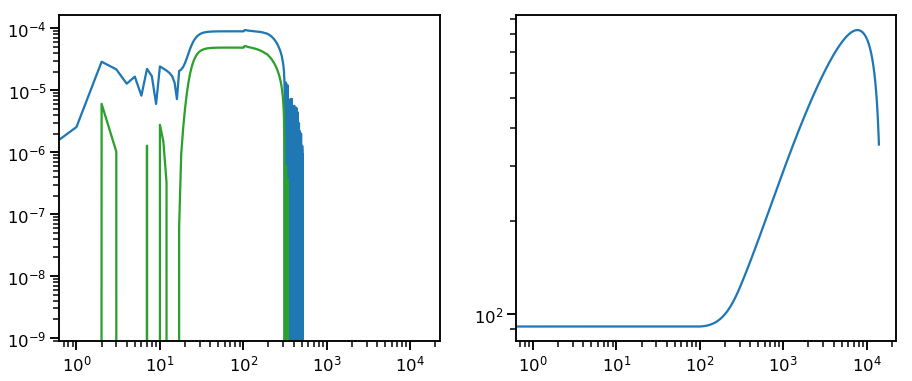

In [46]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].loglog(a)
ax[1].loglog(debug.R)

In [10]:
debug.a[4]

'[ 1.28007193e-05  0.00000000e+00 -5.36535664e-06]'

In [23]:
debug.a[1].strip('[]').split(' ')

['', '2.55940153e-06', '', '0.00000000e+00', '-1.25957009e-05']

In [24]:
debug.a[1]

'[ 2.55940153e-06  0.00000000e+00 -1.25957009e-05]'

In [26]:
debug.a[0]

'[0 0 0]'

In [37]:
debug.a[1].strip('[]\'').split()

['2.55940153e-06', '0.00000000e+00', '-1.25957009e-05']